# Imports

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import sys
sys.path.append('../fastai/') #fastai version 1.0

from fastai.vision import *

import pandas as pd
import numpy as np
import os
import torch
from torchsummary import summary
from torchvision.models import *
from pathlib import Path
from functools import partial, update_wrapper

PATH = Path('/home/Deep_Learner/work/network/datasets/Histopathologic-Cancer-Detection')
TRAIN_NAME = 'train'
TRAIN = PATH/TRAIN_NAME
CSV_NAME = 'train_labels.csv'
LABELS = PATH/CSV_NAME
TEST_NAME = 'test'
TEST = PATH/TEST_NAME
SAMPLE = PATH/'sample_submission.csv'

nw = 4   #number of workers for data loader
torch.cuda.set_device(0)
torch.backends.cudnn.benchmark=True
np.random.seed(42)

sz = 96
bs = 64

# Data 

In [ ]:
data = (ImageItemList.from_csv(path=PATH, csv_name=CSV_NAME, folder=TRAIN_NAME, suffix='.tif')
.random_split_by_pct(0.2)
.label_from_df()
.add_test_folder(test_folder=TEST_NAME, label=None)
.transform(get_transforms(flip_vert=True), size=sz)
.databunch(bs=bs, num_workers=nw)
.normalize(imagenet_stats))

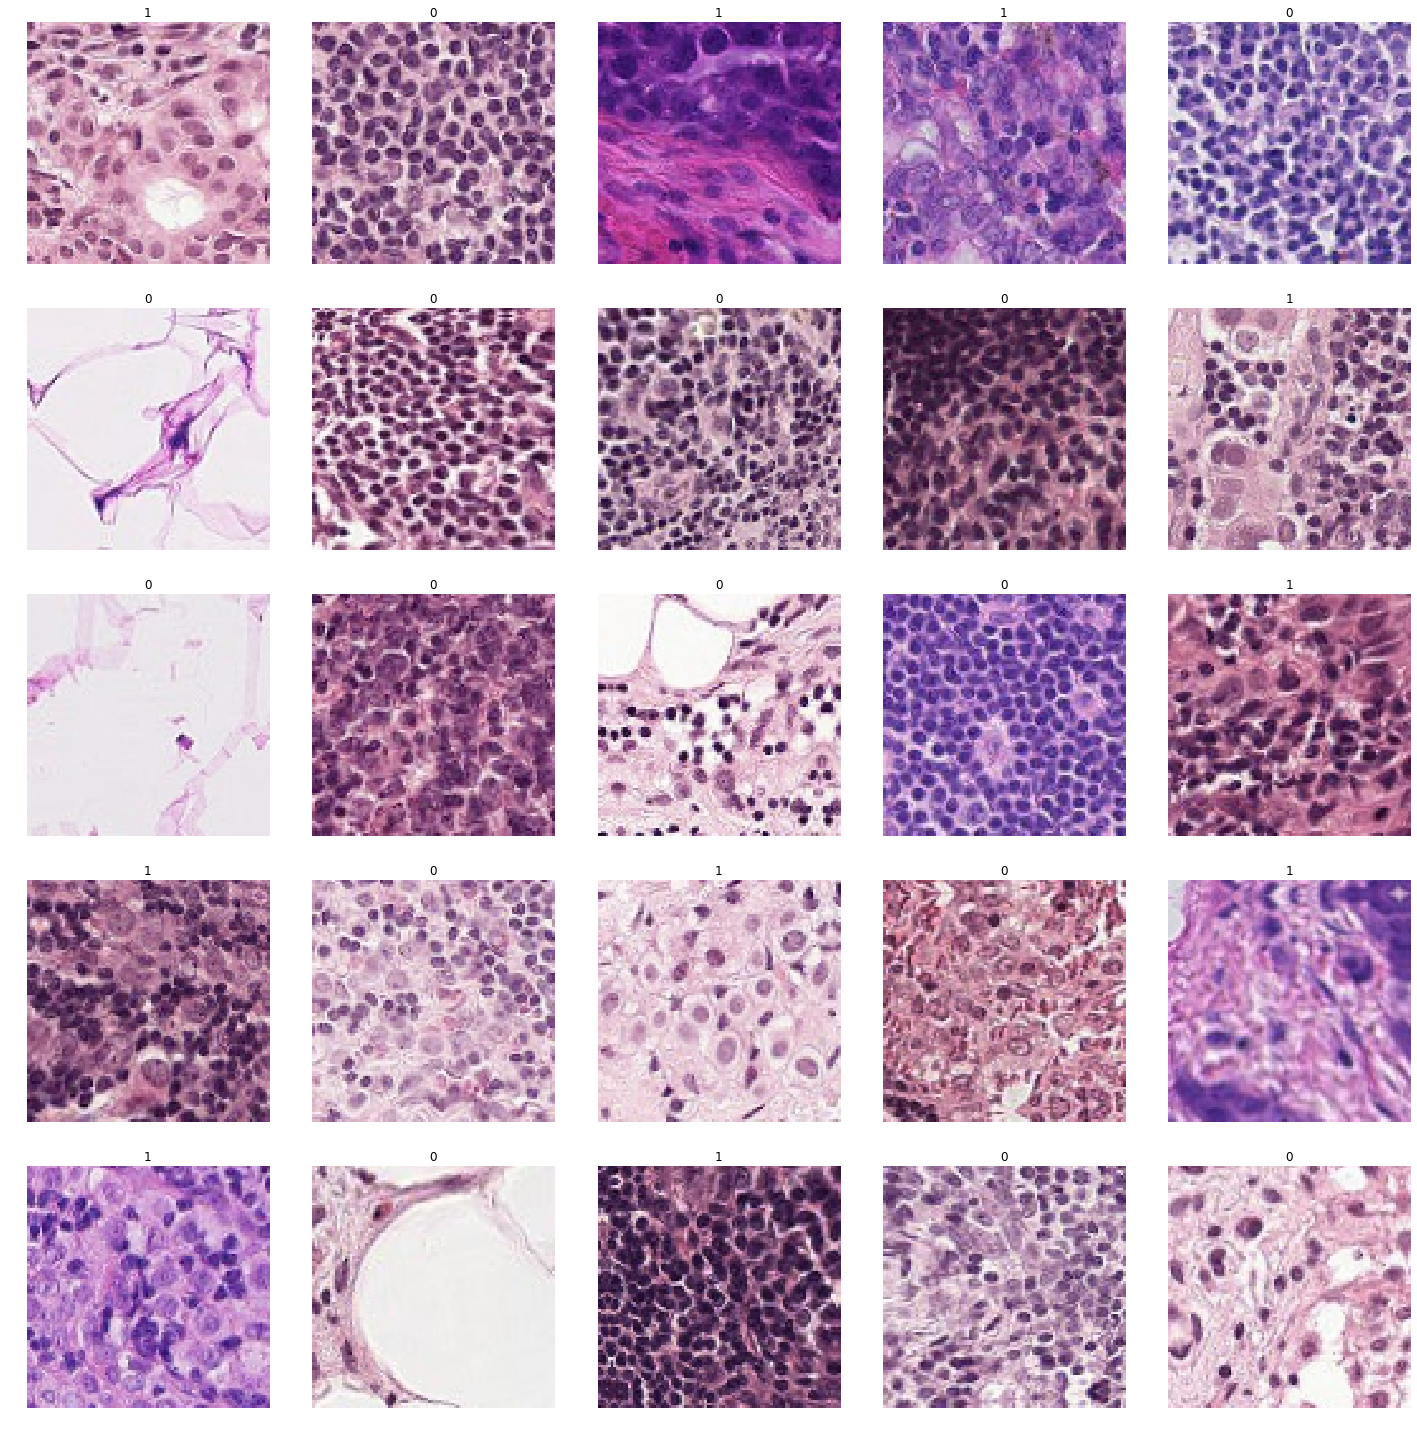

In [16]:
data.show_batch()

# Train

In [ ]:
arch = resnet34

In [ ]:
#f_score = partial(fbeta, thresh=0.2)

In [ ]:
learner = create_cnn(data=data, 
                     arch=arch, 
                     loss_func=torch.nn.CrossEntropyLoss(),
                     metrics=[accuracy])

In [21]:
learner.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


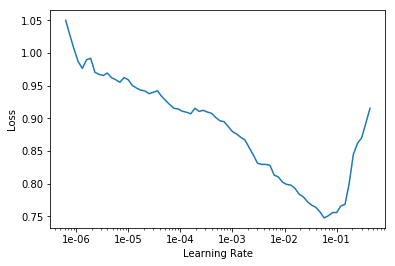

In [22]:
learner.recorder.plot()

In [23]:
lr = 1e-3

In [ ]:
learner.fit_one_cycle(5, slice(lr))